Deep Learning Using R with keras (RNN)
In this notebook, we will walk through how to use the keras R package for a toy example in deep learning with text dataset (i.e. IMDB Review). The purpose of the notebook is to have hands-on experience and get familar with the Recurrent Neural Network part of the training course. Please check the keras R package website for most recent development: https://keras.rstudio.com/

We are using databrick community edition with R as the interface for this deep learning training for audience with statistics background with the following consideration:

Minimum language barrier in coding for most statisticians
Zero setup to save time using cloud envriment
Get familar with current trend of cloud computing in coorprate setup

In [1]:
library(keras)
install_keras()

Creating virtualenv for TensorFlow at  ~/.virtualenvs/r-tensorflow 
Installing TensorFlow ...

Installation complete.



In [2]:
max_unique_word <- 2500
max_review_len <- 100

In [3]:
my_imdb <- dataset_imdb(num_words = max_unique_word)
str(my_imdb)

List of 2
 $ train:List of 2
  ..$ x:List of 25000
  .. ..$ : int [1:218] 1 14 22 16 43 530 973 1622 1385 65 ...
  .. ..$ : int [1:189] 1 194 1153 194 2 78 228 5 6 1463 ...
  .. ..$ : int [1:141] 1 14 47 8 30 31 7 4 249 108 ...
  .. ..$ : int [1:550] 1 4 2 2 33 2 4 2040 432 111 ...
  .. ..$ : int [1:147] 1 249 1323 7 61 113 10 10 13 1637 ...
  .. ..$ : int [1:43] 1 778 128 74 12 630 163 15 4 1766 ...
  .. ..$ : int [1:123] 1 2 365 1234 5 1156 354 11 14 2 ...
  .. ..$ : int [1:562] 1 4 2 716 4 65 7 4 689 2 ...
  .. ..$ : int [1:233] 1 43 188 46 5 566 264 51 6 530 ...
  .. ..$ : int [1:130] 1 14 20 47 111 439 2 19 12 15 ...
  .. ..$ : int [1:450] 1 785 189 438 47 110 142 7 6 2 ...
  .. ..$ : int [1:99] 1 54 13 1610 14 20 13 69 55 364 ...
  .. ..$ : int [1:117] 1 13 119 954 189 1554 13 92 459 48 ...
  .. ..$ : int [1:238] 1 259 37 100 169 1653 1107 11 14 418 ...
  .. ..$ : int [1:109] 1 503 20 33 118 481 302 26 184 52 ...
  .. ..$ : int [1:129] 1 6 964 437 7 58 43 1402 11 6 ...
  .. ..$ :

In [4]:
x_train <- my_imdb$train$x
y_train <- my_imdb$train$y
x_test  <- my_imdb$test$x
y_test  <- my_imdb$test$y

In [5]:
x_train <- pad_sequences(x_train, maxlen = max_review_len)
x_test <- pad_sequences(x_test, maxlen = max_review_len)

str(x_train)
str(y_train)

 int [1:25000, 1:100] 1415 163 1301 40 13 0 4 133 15 1109 ...
 int [1:25000] 1 0 0 1 0 0 1 0 1 0 ...


In [6]:
max(x_train)
table(x_train)

[1] 2499

x_train
     0      1      2      4      5      6      7      8      9     10     11 
 87109   2822 332932 131486  67788  64702  56210  53879  43342  45518  35667 
    12     13     14     15     16     17     18     19     20     21     22 
 36954  33552  34683  27890  19438  18195  19360  16727  21043  18702  16959 
    23     24     25     26     27     28     29     30     31     32     33 
 13418  13516  16598  12308   8958  12151   8250  12038  11012  10900   9562 
    34     35     36     37     38     39     40     41     42     43     44 
  7864   8087   8311   7207   8601   7713   9001   5907   7780   8149   6540 
    45     46     47     48     49     50     51     52     53     54     55 
  7863   7521   5962   9298   6579   6510   6196   7745   6498   4789   6218 
    56     57     58     59     60     61     62     63     64     65     66 
  5137   5276   5635   4191   5668   5809   5710   4486   5152   4800   5320 
    67     68     69     70     71     72     73     74 

# 3 Simple Recurrent Neurel Network

In [7]:
rnn_model <- keras_model_sequential()
rnn_model %>%
  layer_embedding(input_dim = max_unique_word, output_dim = 128) %>% 
  layer_simple_rnn(units = 64, dropout = 0.2, recurrent_dropout = 0.2) %>% 
  layer_dense(units = 1, activation = 'sigmoid')

In [8]:
rnn_model %>% compile(
  loss = 'binary_crossentropy',
  optimizer = 'adam',
  metrics = c('accuracy')
)

In [9]:
batch_size = 128
epochs = 5
validation_split = 0.2

rnn_history <- rnn_model %>% fit(
  x_train, y_train,
  batch_size = batch_size,
  epochs = epochs,
  validation_split = validation_split
)

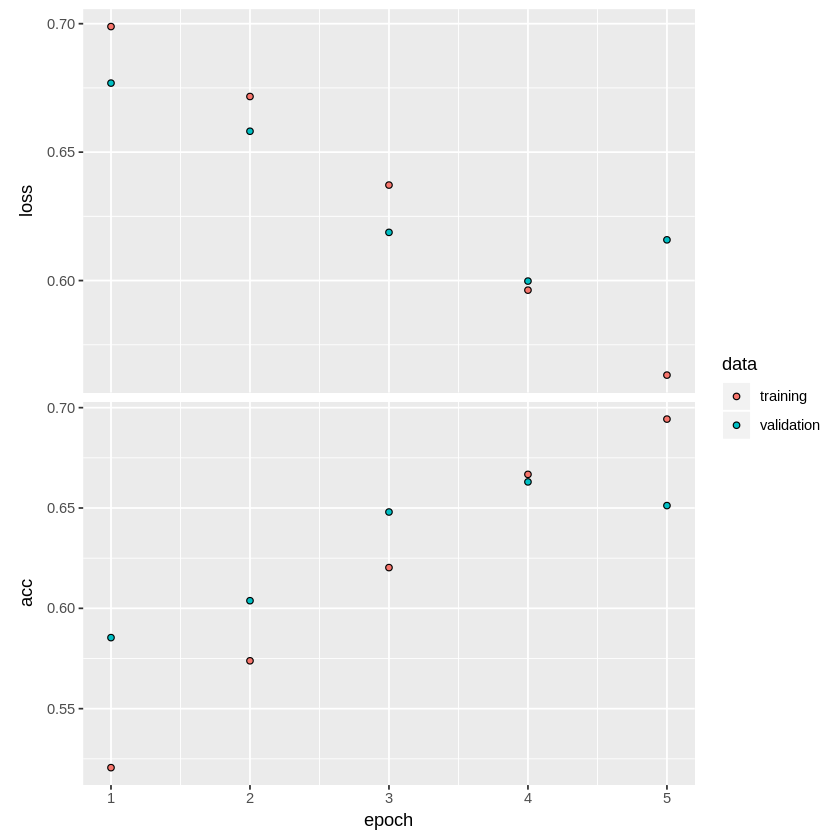

In [10]:
plot(rnn_history)

In [11]:
rnn_model %>% 
   evaluate(x_test, y_test)

$loss
[1] 0.6158879

$acc
[1] 0.64872

# 4 LSTM RNN Model

In [12]:
lstm_model <- keras_model_sequential()

lstm_model %>%
  layer_embedding(input_dim = max_unique_word, output_dim = 128) %>% 
  layer_lstm(units = 64, dropout = 0.2, recurrent_dropout = 0.2) %>% 
  layer_dense(units = 1, activation = 'sigmoid')

lstm_model %>% compile(
  loss = 'binary_crossentropy',
  optimizer = 'adam',
  metrics = c('accuracy')
)

batch_size = 128
epochs = 5
validation_split = 0.2

lstm_history <- lstm_model %>% fit(
  x_train, y_train,
  batch_size = batch_size,
  epochs = epochs,
  validation_split = validation_split
)

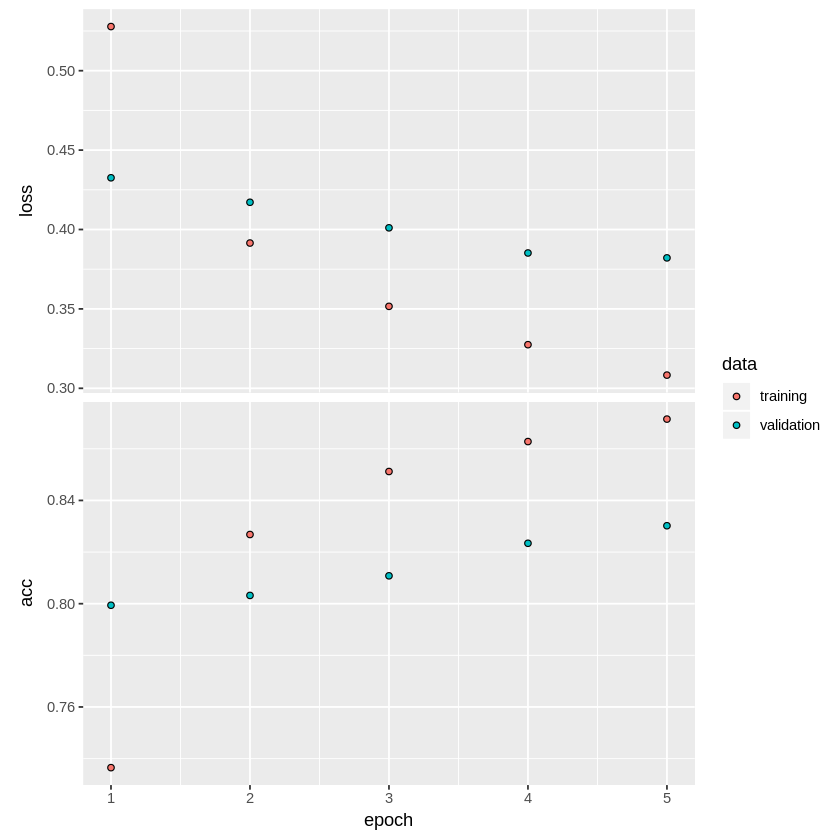

In [13]:
plot(lstm_history)

In [14]:
lstm_model %>% 
   evaluate(x_test, y_test)

$loss
[1] 0.3707043

$acc
[1] 0.83672

From this simple example, we can see that LSTM's performance has improved dramatically from the simple RNN model. The computation time for LSTM is roughly doubled when compared with simple RNN model for this small dataset.